In [92]:
import torch.nn as nn 
import torch.nn.functional as f 
import torch 

In [93]:
class Model(nn.Module):
    def __init__(self,in_properties=4,h1=8,h2=7,out_properties=3) -> None:
        super().__init__()
        self.con1 = nn.Linear(in_properties,h1)
        self.con2 = nn.Linear(h1,h2)
        self.end = nn.Linear(h2,out_properties)
    def forward(self,x) :
        x = f.relu(self.con1(x)) 
        x = f.relu(self.con2(x))   
        x = self.end(x)
        return x

In [94]:
torch.manual_seed(41)
model = Model()

In [95]:
import pandas as pd 
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df.tail()
my_df["variety"] = my_df["variety"].replace("Virginica",0.0)
my_df["variety"] = my_df["variety"].replace("Setosa",1.0)
my_df["variety"] = my_df["variety"].replace("Versicolor",2.0)


C:\Users\AUTHENTIC PLUS STORE\AppData\Local\Temp\ipykernel_11136\788478103.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["variety"] = my_df["variety"].replace("Versicolor",2.0)


In [96]:
X = my_df.drop("variety",axis=1)
y = my_df["variety"]
X= X.values
y = y.values
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)



In [99]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [101]:
epochs = 200
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) 
  loss = criterion(y_pred, y_train) 
  print(f'Epoch: {i} and loss: {loss}')
  losses.append(loss.detach().numpy())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1100109815597534
Epoch: 1 and loss: 1.092403531074524
Epoch: 2 and loss: 1.0937652587890625
Epoch: 3 and loss: 1.088356852531433
Epoch: 4 and loss: 1.0782643556594849
Epoch: 5 and loss: 1.0640432834625244
Epoch: 6 and loss: 1.0572298765182495
Epoch: 7 and loss: 1.0492138862609863
Epoch: 8 and loss: 1.037291407585144
Epoch: 9 and loss: 1.021618127822876
Epoch: 10 and loss: 1.0031479597091675
Epoch: 11 and loss: 0.9839496612548828
Epoch: 12 and loss: 0.9647382497787476
Epoch: 13 and loss: 0.9432357549667358
Epoch: 14 and loss: 0.9180817008018494
Epoch: 15 and loss: 0.8903446793556213
Epoch: 16 and loss: 0.8612087368965149
Epoch: 17 and loss: 0.8302038311958313
Epoch: 18 and loss: 0.7970203757286072
Epoch: 19 and loss: 0.7625839114189148
Epoch: 20 and loss: 0.727466344833374
Epoch: 21 and loss: 0.6930350065231323
Epoch: 22 and loss: 0.6599550843238831
Epoch: 23 and loss: 0.6279697418212891
Epoch: 24 and loss: 0.5971899032592773
Epoch: 25 and loss: 0.5680641531944275
E

Text(0.5, 0, 'epoch')

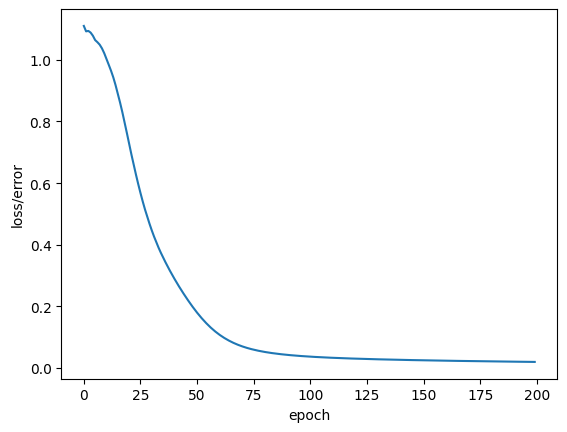

In [102]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.plot(range(epochs),losses)
pl.ylabel("loss/error")
pl.xlabel("epoch")

In [103]:

    
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'
    if y_val.argmax().item() == 0:
      y = "Setosa"
    elif y_val.argmax().item() == 1:
      y = 'Versicolor'
    else:
      y = 'Virginica'
    print(f"""{i+1}) actual = {x} \nprediction = {y}\n""")
    
    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct your loss was {loss}') 

1) actual = Virginica 
prediction = Virginica

2) actual = Setosa 
prediction = Setosa

3) actual = Versicolor 
prediction = Versicolor

4) actual = Virginica 
prediction = Virginica

5) actual = Setosa 
prediction = Setosa

6) actual = Versicolor 
prediction = Versicolor

7) actual = Setosa 
prediction = Setosa

8) actual = Virginica 
prediction = Virginica

9) actual = Versicolor 
prediction = Versicolor

10) actual = Versicolor 
prediction = Versicolor

11) actual = Setosa 
prediction = Setosa

12) actual = Virginica 
prediction = Virginica

13) actual = Setosa 
prediction = Setosa

14) actual = Versicolor 
prediction = Versicolor

15) actual = Setosa 
prediction = Setosa

16) actual = Virginica 
prediction = Setosa

17) actual = Virginica 
prediction = Setosa

18) actual = Virginica 
prediction = Virginica

19) actual = Setosa 
prediction = Setosa

20) actual = Versicolor 
prediction = Versicolor

21) actual = Setosa 
prediction = Setosa

22) actual = Setosa 
prediction = Setosa

2

In [118]:
flower = torch.Tensor([7,2,2,2])
with torch.no_grad():
    print(model.forward(flower).argmax().item())

2


In [119]:
torch.save(model.state_dict(),"flower_class")

In [120]:
new = Model()
new.load_state_dict(torch.load("flower_class"))
new.eval()


C:\Users\AUTHENTIC PLUS STORE\AppData\Local\Temp\ipykernel_11136\3036615445.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new.load_state_dict(torch.load("flower_class"

Model(
  (con1): Linear(in_features=4, out_features=8, bias=True)
  (con2): Linear(in_features=8, out_features=7, bias=True)
  (end): Linear(in_features=7, out_features=3, bias=True)
)